# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [145]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [146]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [147]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [148]:
# Fetch the Bitcoin news articles
Bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en")
Bitcoin_news

{'status': 'ok',
 'totalResults': 8643,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'Why fossil fuel companies see green in Bitcoin mining projects',
   'description': 'ExxonMobil and other fossil fuel companies have turned to Bitcoin mining to address a gas problem. But their plans come with risks.',
   'url': 'https://www.theverge.com/2022/5/4/23055761/exxonmobil-cryptomining-bitcoin-methane-gas',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/BZdljrBbt8tBl6oCCnckcDKqe6g=/0x90:4608x2503/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23435975/1240300988.jpg',
   'publishedAt': '2022-05-04T12:00:00Z',
   'content': 'A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]'},
  {'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Mariell

In [149]:
# Fetch the Ethereum news articles
Ethereum_news = newsapi.get_everything(q="Ethereum", language="en")
Ethereum_news

{'status': 'ok',
 'totalResults': 4754,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Emma Roth',
   'title': 'US blames North Korean hacker group for $625 million Axie Infinity theft',
   'description': 'The US Department of Treasury has attributed the $625 Axie Infinity theft to Lazarus, a North Korean hacking group with ties to the country’s intelligence agency.',
   'url': 'https://www.theverge.com/2022/4/14/23025739/north-korean-hacker-lazarus-axie-infinity-cryptocurrency-hack-theft-us-blames',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/n8TGCqcud7UHPIbtgxLi10Owa5I=/0x52:1018x585/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23374959/Screen_Shot_2022_03_30_at_10.10.00_AM.png',
   'publishedAt': '2022-04-14T21:43:57Z',
   'content': 'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin netw

In [151]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_list = [] 

def news_df(news):
    for txt in news['articles']:   
            text = txt['content']
            feeling = analyzer.polarity_scores(text)
            compound = feeling['compound']
            positive = feeling["pos"]
            neutral = feeling["neu"]
            negative = feeling['neg']

            bitcoin_list.append({
                "compound":compound,
                "positive": positive,
                "neutral": neutral,
                "negative": negative,
                "text": text

            })
    
          
news_df(Bitcoin_news)
bitcoin_df = pd.DataFrame(bitcoin_list)


In [152]:
# Create the Ethereum sentiment scores DataFrame
eth_list = [] 

def news_df(news):
    for txt in news['articles']:   
            text = txt['content']
            feeling = analyzer.polarity_scores(text)
            compound = feeling['compound']
            positive = feeling["pos"]
            neutral = feeling["neu"]
            negative = feeling['neg']

            eth_list.append({
                "compound":compound,
                "positive": positive,
                "neutral": neutral,
                "negative": negative,
                "text": text
            })
    
          
news_df(Ethereum_news)
eth_df = pd.DataFrame(eth_list)
eth_df


,compound,positive,neutral,negative,text
0,-0.7845,0.088,0.681,0.231,The US Department of Treasury says Lazarus is ...
1,0.1027,0.084,0.844,0.071,"18 with 15 posters participating, including st..."
2,0.6486,0.135,0.865,0.000,Meta has revealed more of how NFTs will work o...
3,0.7351,0.188,0.812,0.000,"Opera launched its dedicated ""Crypto Browser"" ..."
4,-0.2263,0.046,0.879,0.075,A multi-billion dollar cryptocurrency company ...
5,-0.2732,0.000,0.945,0.055,When Bored Ape Yacht Club creators Yuga Labs a...
6,-0.2960,0.057,0.829,0.114,The news: A former developer of the cryptocurr...
7,0.5346,0.142,0.858,0.000,April 26 (Reuters) - Ether has promised to do ...
8,0.2716,0.065,0.935,0.000,Ethereum is preparing for an upgrade thats bee...
9,0.4003,0.078,0.922,0.000,Dogecoiners unite! Movie theater chain AMC has...


In [153]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,neutral,negative
count,20.000000,20.00000,20.000000,20.000000
mean,0.079260,0.08215,0.856000,0.061850
std,0.400107,0.06259,0.089861,0.065201
min,-0.690800,0.00000,0.557000,0.000000
25%,-0.273200,0.04800,0.815750,0.000000
50%,0.102700,0.08100,0.870500,0.063000
75%,0.355075,0.09175,0.922250,0.072500
max,0.750600,0.20200,0.958000,0.241000


In [154]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,neutral,negative
count,20.000000,20.00000,20.000000,20.000000
mean,-0.102445,0.04415,0.888850,0.066950
std,0.442160,0.05859,0.079955,0.073236
min,-0.784500,0.00000,0.681000,0.000000
25%,-0.317450,0.00000,0.840250,0.000000
50%,-0.249750,0.00000,0.921000,0.063000
75%,0.144925,0.07950,0.937000,0.077750
max,0.735100,0.18800,1.000000,0.233000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [155]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, reuters
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('reuters')


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [156]:
# Instantiate the lemmatizer
lem = WordNetLemmatizer()
# Create a list of stopwords
sw = stopwords.words("english")
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [157]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    token_list = word_tokenize(text)
    # Remove the punctuation from text
    token_list = list(filter(lambda w: w not in punctuation, token_list))
   
    # Create a tokenized list of the words
    
    
    # Lemmatize words into root words
    token_list = list(filter(lambda w: w.lower(), token_list))
   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    token_list = list(filter(lambda w: w.lower() not in sw, token_list))

    tokens = [lem.lemmatize(word) for word in token_list]
    
    return tokens



In [158]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,compound,positive,neutral,negative,text,tokens
0,-0.0516,0.056,0.882,0.061,A Bitcoin mining site powered by otherwise los...,"[Bitcoin, mining, site, powered, otherwise, lo..."
1,0.4019,0.088,0.912,0.000,Wikipedia editors have voted in favor of dropp...,"[Wikipedia, editor, voted, favor, dropping, cr..."
2,-0.3269,0.085,0.772,0.143,Warren Buffett has always been a bitcoin skept...,"[Warren, Buffett, always, bitcoin, skeptic, bi..."
3,0.3400,0.072,0.928,0.000,"Image source, Getty Images\r\nThe value of Bit...","[Image, source, Getty, Images, value, Bitcoin,..."
4,0.7506,0.193,0.807,0.000,If youve ever felt like introducing some Vegas...,"[youve, ever, felt, like, introducing, Vegas-s..."


In [159]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = bitcoin_df.text.apply(tokenizer)


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [160]:
from collections import Counter
from nltk import ngrams

In [161]:
print(bitcoin_df.text.str.cat())

A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images

 

 Of all the corporate climate hype fl… [+6544 chars]Wikipedia editors have voted in favor of dropping cryptocurrency from the Wikimedia Foundation's donation options. As Ars Technica reports, an editor for the online encyclopedia called GorillaWarfare… [+1577 chars]Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]Image source, Getty Images
The value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to the Coinbase cryptocurrency exchange.
The world's largest cryp… [+2164 chars]If youve ever felt like introducing some Vegas-style odds into your retirement plan, youre finally in luck.
Last week, Fidelity Investments announc

In [162]:
# Generate the Bitcoin N-grams where N=2
bitcoin_grams = ngrams(tokenizer(bitcoin_df.text.str.cat()),n=2)
Counter(bitcoin_grams).most_common(10)

[(('world', "'s"), 5),
 (('char', 'May'), 4),
 (('Reuters', 'Bitcoin'), 4),
 (("'s", 'biggest'), 4),
 (('previous', 'close'), 3),
 (('close', 'Bitcoin'), 3),
 (('Bitcoin', 'world'), 3),
 (('biggest', 'best-known'), 3),
 (('best-known', 'cryptocurrency'), 3),
 (('Getty', 'Images'), 2)]

In [163]:
# Generate the Ethereum N-grams where N=2
eth_grams = ngrams(tokenizer(eth_df.text.str.cat()),n=2)

In [164]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [165]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokenizer(bitcoin_df.text.str.cat()), 10)

[('char', 19),
 ('Bitcoin', 11),
 ("'s", 11),
 ('cryptocurrency', 10),
 ('world', 6),
 ('Reuters', 6),
 ('bitcoin', 5),
 ('April', 4),
 ('online', 4),
 ('dropped', 4)]

In [166]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokenizer(eth_df.text.str.cat()), 10)

[('char', 20),
 ('cryptocurrency', 9),
 ("'s", 9),
 ('Bitcoin', 8),
 ('Ethereum', 6),
 ('year', 5),
 ('``', 4),
 ('April', 4),
 ('biggest', 4),
 ('Reuters', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [167]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

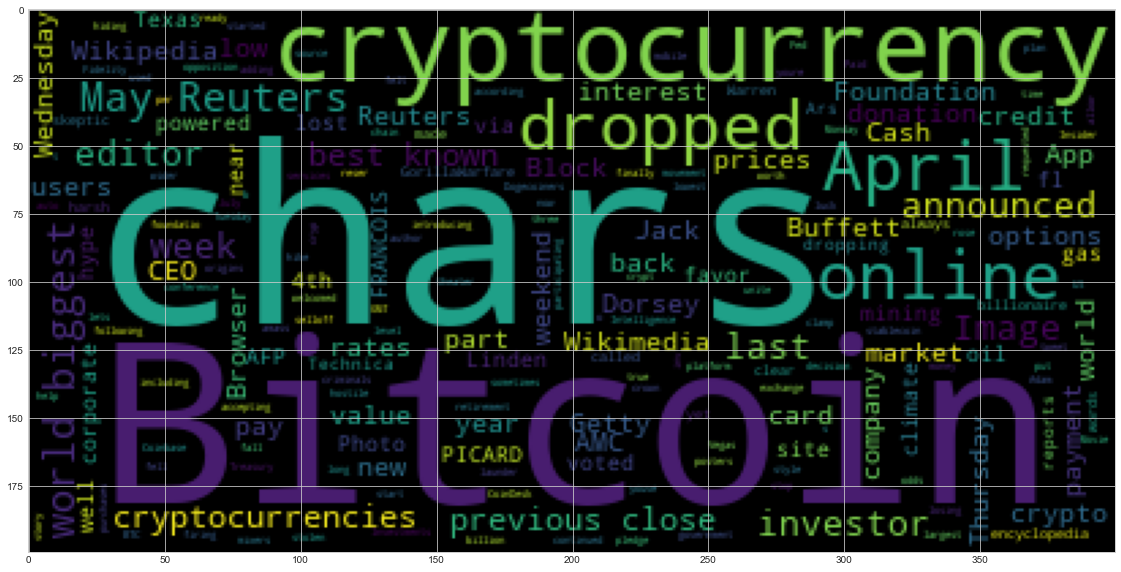

In [168]:
# Generate the Bitcoin word cloud
bitcloud = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(bitcloud)

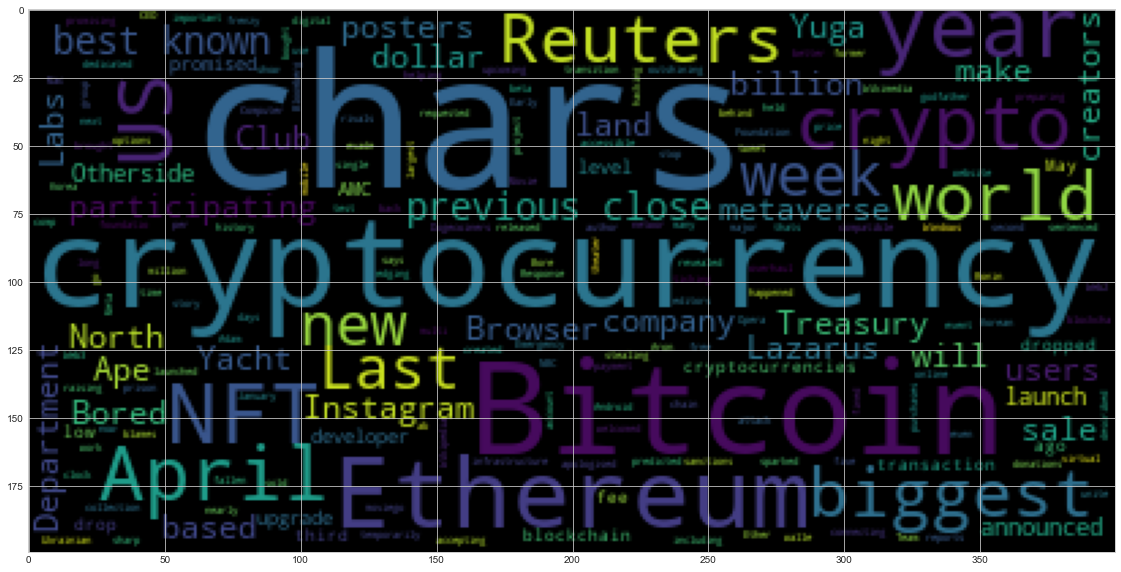

In [169]:
# Generate the Ethereum word cloud
ethcloud = WordCloud().generate(eth_df.text.str.cat())
plt.imshow(ethcloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [170]:
import spacy
from spacy import displacy

In [171]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [172]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [173]:
# Concatenate all of the Bitcoin text together
bitcoin_text = bitcoin_df.text.str.cat()

In [174]:
# Run the NER processor on all of the text
nlp_bitcoin = nlp(bitcoin_text)
# Add a title to the document
nlp_bitcoin.user_data['title'] = "bitcoin"

In [175]:
# Render the visualization
displacy.render(nlp_bitcoin, style='ent', jupyter=True)

In [176]:
# List all Entities
for ent in nlp_bitcoin.ents:
    print(ent.text, ent.label_)


Linden GPE
Texas GPE
April 4th, 2022 DATE
Photo PERSON
FRANCOIS PICARD/AFP ORG
Getty Images ORG
the Wikimedia Foundation's ORG
Ars Technica PERSON
GorillaWarfare ORG
Buffett PERSON
the weekend DATE
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
chars]April 12 DATE
Reuters ORG
$10 billion MONEY
Block GPE
Jack Dorsey PERSON
three CARDINAL
Thursday DATE
CoinDesk PRODUCT
Cash App PERSON
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
9 CARDINAL
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
16% PERCENT
year DATE
+339 chars]May 4 ORG
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Crypto Browser WORK

---

### Ethereum NER

In [177]:
# Concatenate all of the Ethereum text together
eth_text = eth_df.text.str.cat()

In [178]:
# Run the NER processor on all of the text
nlp_eth = nlp(eth_text)
# Add a title to the document
nlp_eth.user_data['title'] = "eth"

In [179]:
# Render the visualization
displacy.render(nlp_eth, style='ent', jupyter=True)

In [180]:
# List all Entities
for ent in nlp_eth.ents:
    print(ent.text, ent.label_)

The US Department of Treasury ORG
The US Treasury Department ORG
North Korean NORP
$625 million MONEY
Ronin PERSON
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
+4016 PERSON
Instagram ORG
US GPE
Instagram ORG
Crypto Browser WORK_OF_ART
January DATE
Windows, Mac ORG
Android ORG
Ethereum ORG
Yuga Labs PERSON
Yacht Club ORG
Yuga Labs PERSON
Otherside NFT LAW
April 30 DATE
NFT ORG
Ethereum ORG
more than five years DATE
100,000 MONEY
North Korea GPE
US GPE
NBC News ORG
chars]April 26 DATE
Reuters ORG
No.2 CARDINAL
second ORDINAL
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Last night TIME
Bloomberg GPE
nearly a third CARDINAL
a billion dollars MONEY
chars]40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
Ethereum ORG
Merge PERSON
a few months after June DATE
first ORDINAL
a year and a half ago DATE
The Order Flow WORK_OF_ART
Dan Rob

---